In [2]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/42/88/2127d45519d1d413f564d4be9e8d12857ba42c4d76f87aec2f78e99233e4/yfinance-0.2.55-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 3.3 MB/s eta 0:00:01
     -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
anaconda-client 1.12.1 requires urllib3>=1.26.4, but you have urllib3 1.25.11 which is incompatible.
app-store-scraper 0.3.5 requires requests==2.23.0, but you have requests 2.32.3 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [4]:

tesla_ticker = yf.Ticker("TSLA")

tesla_data = tesla_ticker.history(period="max")


tesla_data.reset_index(inplace=True)


tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url_tesla, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
print(f"Found {len(tables)} tables.")


for i, t in enumerate(tables):
    print(f"\nTable #{i}")
    print(t.prettify()[:300])  


tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = tables[0]

for row in table.tbody.find_all("tr"):
    col = row.find_all("td")
    if len(col) >= 2:
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()


Found 6 tables.

Table #0
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Annual Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2024
  

Table #1
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2024

Table #2
<table class="historical_data_table table">
 <thead>
  <tr>
   <th style="text-align:center">
    Sector
   </th>
   <th style="text-align:center">
    Industry
   </th>
   <th style="text-align:center">
    Market Cap
   </th>
   <th style="text-align:center">
    Revenue
   </th>
  </tr>
 </thead>

Table #3
<table class="historical_data_table table

AttributeError: 'DataFrame' object has no attribute 'append'

In [7]:

gme_ticker = yf.Ticker("GME")

gme_data = gme_ticker.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [16]:

gme_ticker = yf.Ticker("GME")

gme_data = gme_ticker.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.tail()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5810,2025-03-18 00:00:00-04:00,23.290001,23.620001,23.139999,23.299999,2155800,0.0,0.0
5811,2025-03-19 00:00:00-04:00,23.400000,23.990000,23.260000,23.709999,3032300,0.0,0.0
5812,2025-03-20 00:00:00-04:00,23.650000,24.120001,23.510000,23.510000,1998200,0.0,0.0
5813,2025-03-21 00:00:00-04:00,23.750000,24.809999,23.650000,24.750000,6893900,0.0,0.0
5814,2025-03-24 00:00:00-04:00,25.350000,25.830000,25.150000,25.610001,5004000,0.0,0.0


In [18]:
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Plot stock price
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a twin axis to plot revenue
    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue in Millions', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='tab:red', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(title)
    fig.tight_layout()
    plt.show()


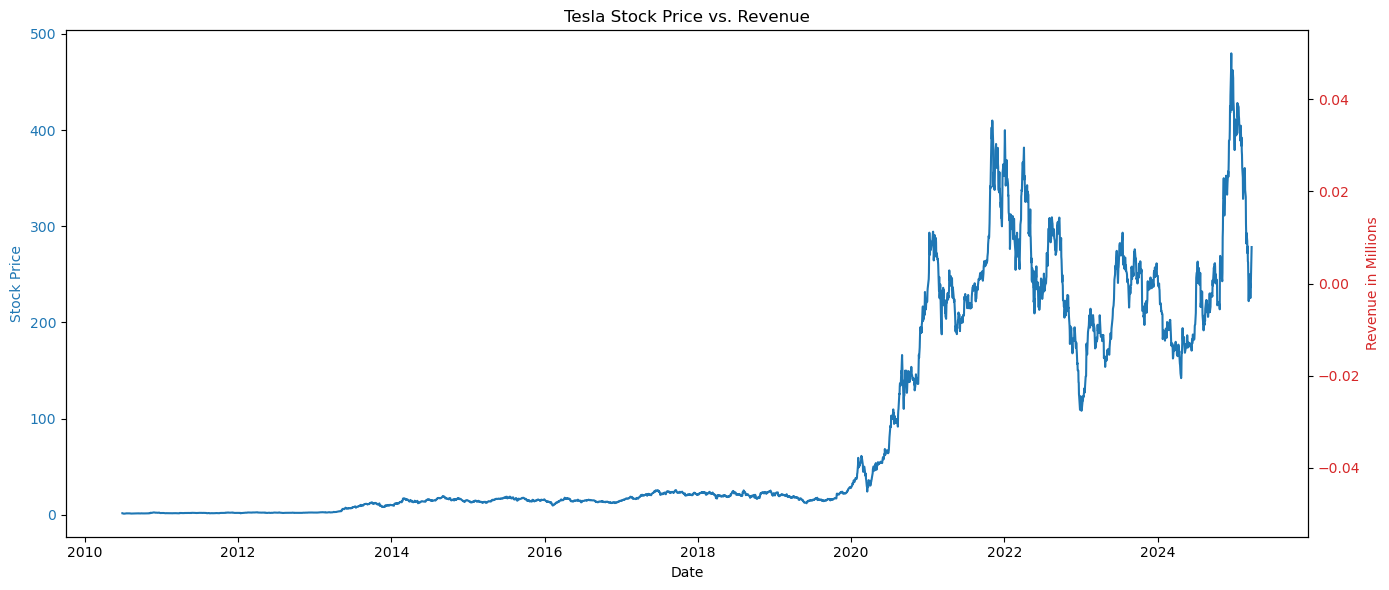

In [19]:
make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla Stock Price vs. Revenue')


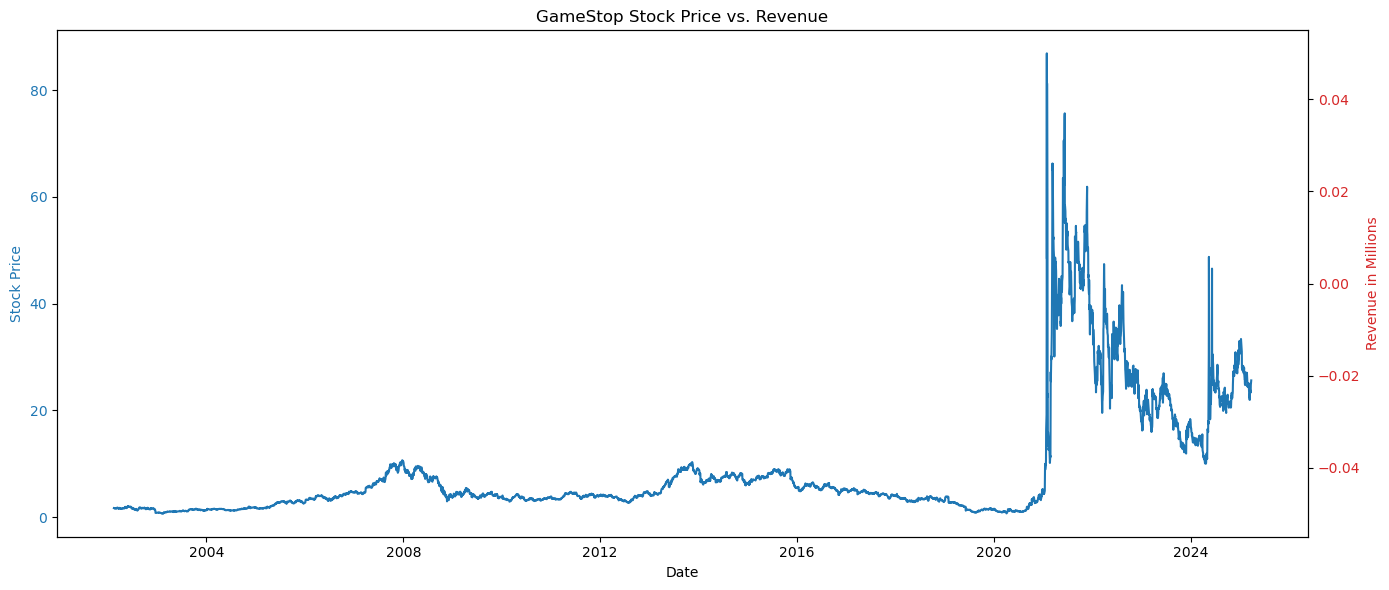

In [20]:
make_graph(gme_data, gme_revenue, 'GME', 'GameStop Stock Price vs. Revenue')
